In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera, normaltest, boxcox
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

### Guided Example:

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

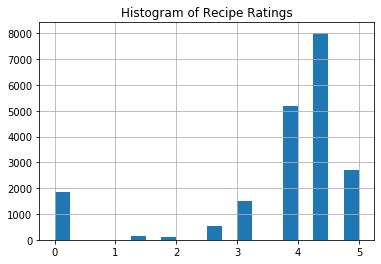

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

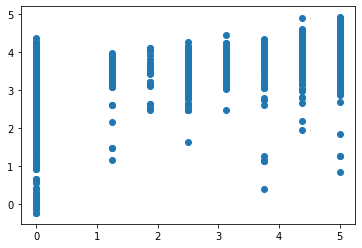

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

0.4099845913800794

In [10]:
cross_val_score(svr, X, Y, cv=5)

array([0.19563385, 0.14683481, 0.15013401, 0.13597791, 0.16082192])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

## Challenge:

In [11]:
raw_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
raw_data.drop('title', axis=1, inplace=True)

In [13]:
raw_data.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Check for numeric columns
num_df = raw_data.select_dtypes(include=['float64', 'int64']).copy()
num_df.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Check for more continuous column types
cont_cols = []
cat_cols = []
for col in num_df.columns:
    if len(num_df[col].unique()) > 10:
        cont_cols.append(col)
    else:
        cat_cols.append(col)
cont_feats = num_df[cont_cols].copy()
cat_feats = num_df[cat_cols].drop('rating', axis=1).copy()

In [16]:
print(len(cont_feats.columns))
print(len(cat_feats.columns))
cont_feats

4
674


,calories,protein,fat,sodium
0,426.0,30.0,7.0,559.0
1,403.0,18.0,23.0,1439.0
2,165.0,6.0,7.0,165.0
3,NaN,NaN,NaN,NaN
4,547.0,20.0,32.0,452.0
...,...,...,...,...
20047,28.0,2.0,2.0,64.0
20048,671.0,22.0,28.0,583.0
20049,563.0,31.0,38.0,652.0
20050,631.0,45.0,24.0,517.0


In [17]:
# dummy encode all the categorical features
for col in cat_feats.columns:
    dum_df = pd.get_dummies(cat_feats[col], prefix= col, drop_first= True)
    cat_feats = pd.concat([cat_feats, dum_df], axis= 1)
    cat_feats.drop(col, axis= 1, inplace= True)


In [18]:
cont_feats.calories.value_counts()

234.0         55
228.0         45
223.0         44
247.0         44
222.0         44
              ..
29997918.0     1
965.0          1
2894.0         1
1946.0         1
1139.0         1
Name: calories, Length: 1858, dtype: int64

In [19]:
cont_feats.describe()

,calories,protein,fat,sodium
count,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04
mean,6.322958e+03,100.160793,3.468775e+02,6.225975e+03
std,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.980000e+02,3.000000,7.000000e+00,8.000000e+01
50%,3.310000e+02,8.000000,1.700000e+01,2.940000e+02
75%,5.860000e+02,27.000000,3.300000e+01,7.110000e+02
max,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07


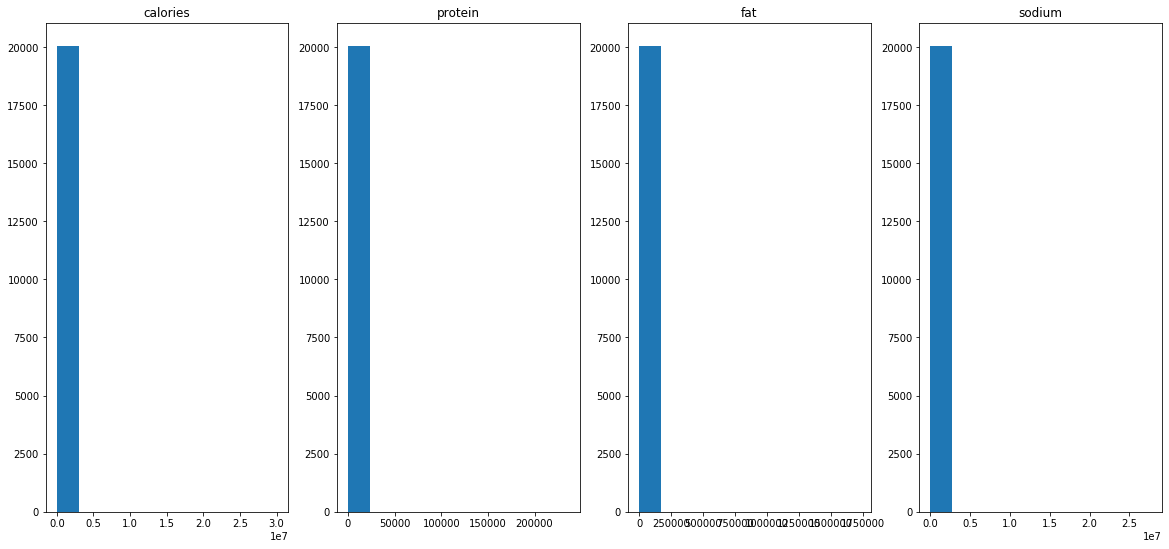

In [20]:
# histograms of continuous columns
fig = plt.subplots(figsize=(20, 9))
for x in range(len(cont_feats.columns)):
    cont_feats.iloc[:, x].fillna(value=cont_feats.iloc[:, x].mean(), inplace=True)    
    plt.subplot(1, 4, x+1)
    plt.hist(cont_feats.iloc[:, x])
    plt.title('{}'.format(cont_feats.columns[x]))

In [21]:
# Winsorize data to take care of outliers
for col in cont_feats.columns:
    winsorized = winsorize(cont_feats[col], (0, 0.03))
    cont_feats['winsorized_log_'+ col] = np.log(winsorized)
    cont_feats.drop(col, axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


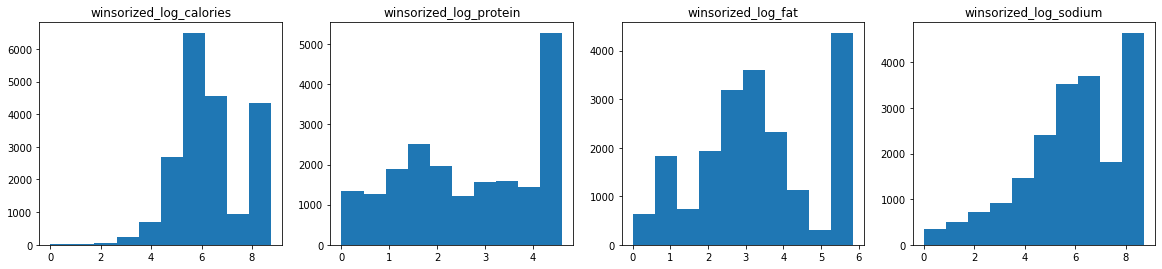

In [22]:
fig = plt.subplots(figsize=(20, 9))
for x in range(len(cont_feats.columns)):
    cont_feats.iloc[:, x].fillna(value=cont_feats.iloc[:, x].mean(), inplace=True)    
    plt.subplot(2, 4, x+1)
    plt.hist(cont_feats.iloc[:, x])
    plt.title('{}'.format(cont_feats.columns[x]))

In [23]:
cont_feats.replace(0, .01, inplace=True)

In [24]:
# This step may be unneccessary, but the data can be further transformed to get a more normal distribution
# Apply boxcox transform to the log transformed, winsorized data 

for col in cont_feats.columns:
    cont_feats['bc_'+ col] = boxcox(cont_feats[col])[0]
    

    jb_stats = jarque_bera(cont_feats['bc_'+ col])
    norm_stats = normaltest(cont_feats['bc_'+ col])
    
    print('--------bc_{}--------'.format(col))
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
    print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
    cont_feats.drop(col, axis=1, inplace=True)

--------bc_winsorized_log_calories--------
Jarque-Bera test statistics is 42.765294961504964 and p value is 5.171710837359456e-10
Normality test statistics is 37.39557430027193 and p value is 7.579738397158092e-09
--------bc_winsorized_log_protein--------
Jarque-Bera test statistics is 1250.5909523292773 and p value is 0.0
Normality test statistics is 2049.902017379 and p value is 0.0
--------bc_winsorized_log_fat--------
Jarque-Bera test statistics is 333.70841696890267 and p value is 0.0
Normality test statistics is 391.1916680391538 and p value is 1.1319014129072136e-85
--------bc_winsorized_log_sodium--------
Jarque-Bera test statistics is 605.3829568574755 and p value is 0.0
Normality test statistics is 897.9998205230497 and p value is 1.0041916327347368e-195


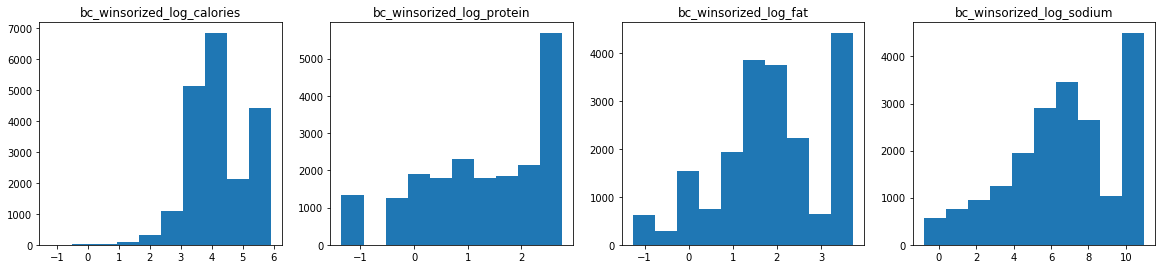

In [25]:
fig = plt.subplots(figsize=(20, 9))
for x in range(len(cont_feats.columns)):  
    plt.subplot(2, 4, x+1)
    plt.hist(cont_feats.iloc[:, x])
    plt.title('{}'.format(cont_feats.columns[x]))

In [26]:
new_data = pd.concat([raw_data['rating'], cont_feats, cat_feats], axis=1)

In [27]:
new_data['rating'].unique()

array([2.5  , 4.375, 3.75 , 5.   , 3.125, 1.875, 0.   , 1.25 ])

In [28]:
num_corr = new_data.corr()
features = list(num_corr.columns)
print('original feature length: {}'.format(len(features)))

# Loops to check correlation under diagonal (where columns correlate with themselves)
for x in range(0, len(num_corr.columns), 1):
    col =  abs(num_corr.iloc[(x+1):, x]).sort_values(ascending=False)
    for y in range(len(col)):
        if col[y] > .700:
            if col.index[y] in features:
                features.remove(col.index[y])
#if 'saleprice' not in features:
#    features.append('saleprice')
print('new feature length: {}'.format(len(features)))

original feature length: 679
new feature length: 661


In [29]:
new_data = new_data[features].copy()

In [30]:
# Classify rating higher than a 4 as having a value of 1 in a binary classification
new_data['rating_class'] = new_data['rating'] > 4
new_data['rating_class'].replace([True, False], [1,0], inplace=True)
new_data.drop('rating', axis=1, inplace=True)

In [31]:
# Fit lasso regression model to prep feature selection model to select 30 best features
X = new_data.drop('rating_class', axis=1).sample(frac=0.3, replace=True, random_state=1)
Y = new_data['rating_class'].sample(frac=0.3, replace=True, random_state=1)

clf = LassoCV().fit(X,Y)
sfm = SelectFromModel(clf, max_features= 30)

In [32]:
# Get the 30 features using the SelectFromModel
sfm.fit(X, Y)
X_transform = sfm.transform(X)
print(X_transform)

In [33]:
# Fit SVC model with selected features and score the accuracy
svc = SVC().fit(X_transform, Y)
score = svc.score(X_transform, Y)
score

0.6376329787234043